In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-fraud-anslysis/Final_Test (1).csv
/kaggle/input/healthcare-fraud-anslysis/Final_Train (1).csv


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
Train = pd.read_csv('/kaggle/input/healthcare-fraud-anslysis/Final_Train (1).csv')
Test = pd.read_csv('/kaggle/input/healthcare-fraud-anslysis/Final_Test (1).csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
Train

,Unnamed: 0,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Inpatient_or_Outpatient,ClaimPeriod,HospitalizationDuration,ExtraClaimDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PatientRiskScore,isDead,IP_OP_TotalReimbursement,IP_OP_AnnualDeductibleAmt,per_Provider_mean_InscClaimAmtReimbursed,per_Provider_mean_DeductibleAmtPaid,per_Provider_mean_IPAnnualReimbursementAmt,per_Provider_mean_IPAnnualDeductibleAmt,per_Provider_mean_OPAnnualReimbursementAmt,per_Provider_mean_OPAnnualDeductibleAmt,per_Provider_mean_Age,per_Provider_mean_NoOfMonths_PartACov,per_Provider_mean_NoOfMonths_PartBCov,per_Provider_mean_HospitalizationDuration,per_Provider_mean_ClaimPeriod,per_Provider_mean_PatientRiskScore,per_BeneID_mean_InscClaimAmtReimbursed,per_BeneID_mean_DeductibleAmtPaid,per_BeneID_mean_IPAnnualReimbursementAmt,per_BeneID_mean_IPAnnualDeductibleAmt,per_BeneID_mean_OPAnnualReimbursementAmt,per_BeneID_mean_OPAnnualDeductibleAmt,per_BeneID_mean_Age,per_BeneID_mean_HospitalizationDuration,per_BeneID_mean_ClaimPeriod,per_BeneID_mean_PatientRiskScore,per_AttendingPhysician_mean_InscClaimAmtReimbursed,per_AttendingPhysician_mean_DeductibleAmtPaid,per_AttendingPhysician_mean_IPAnnualReimbursementAmt,per_AttendingPhysician_mean_IPAnnualDeductibleAmt,per_AttendingPhysician_mean_OPAnnualReimbursementAmt,per_AttendingPhysician_mean_OPAnnualDeductibleAmt,per_AttendingPhysician_mean_Age,per_AttendingPhysician_mean_HospitalizationDuration,per_AttendingPhysician_mean_ClaimPeriod,per_AttendingPhysician_mean_PatientRiskScore,per_OperatingPhysician_mean_InscClaimAmtReimbursed,per_OperatingPhysician_mean_DeductibleAmtPaid,per_OperatingPhysician_mean_IPAnnualReimbursementAmt,per_OperatingPhysician_mean_IPAnnualDeductibleAmt,per_OperatingPhysician_mean_OPAnnualReimbursementAmt,per_OperatingPhysician_mean_OPAnnualDeductibleAmt,per_OperatingPhysician_mean_Age,per_OperatingPhysician_mean_HospitalizationDuration,per_OperatingPhysician_mean_ClaimPeriod,per_OperatingPhysician_mean_PatientRiskScore,per_OtherPhysician_mean_InscClaimAmtReimbursed,per_OtherPhysician_mean_DeductibleAmtPaid,per_OtherPhysician_mean_IPAnnualReimbursementAmt,per_OtherPhysician_mean_IPAnnualDeductibleAmt,per_OtherPhysician_mean_OPAnnualReimbursementAmt,per_OtherPhysician_mean_OPAnnualDeductibleAmt,per_OtherPhysician_mean_Age,per_OtherPhysician_mean_HospitalizationDuration,per_OtherPhysician_mean_ClaimPeriod,per_OtherPhysician_mean_PatientRiskScore,per_ClmDiagnosisCode_1_mean_InscClaimAmtReimbursed,per_ClmDiagnosisCode_1_mean_DeductibleAmtPaid,per_ClmDiagnosisCode_1_mean_IPAnnualReimbursementAmt,per_ClmDiagnosisCode_1_mean_IPAnnualDeductibleAmt,per_ClmDiagnosisCode_1_mean_OPAnnualReimbursementAmt,per_ClmDiagnosisCode_1_mean_OPAnnualDeductibleAmt,per_ClmDiagnosisCode_1_mean_Age,per_ClmDiagnosisCode_1_mean_HospitalizationDuration,per_ClmDiagnosisCode_1_mean_ClaimPeriod,per_ClmDiagnosisCode_1_mean_PatientRiskScore,per_ClmDiagnosisCode_2_mean_InscClaimAmtReimbursed,per_ClmDiagnosisCode_2_mean_DeductibleAmtPaid,per_ClmDiagnosisCode_2_mean_IPAnnualReimbursementAmt,per_ClmDiagnosisCode_2_mean_IPAnnualDeductibleAmt,per_ClmDiagnosisCode_2_mean_OPAnnualReimbursementAmt,per_ClmDiagnosisCode_2_mean_OPAnnualDeductibleAmt,per_ClmDiagnosisCode_2_mean_Age,per_ClmDiagnosisCode_2_mean_HospitalizationDuration,per_ClmDiagnosisCode_2_mean_ClaimPeriod,per_ClmDiagnosisCode_2_mean_PatientRiskScore,per_ClmDiagnosisCode_3_mean_InscClaimAmtReimbursed,per_ClmDiagnosisCode_3_mean_DeductibleAmtPaid,per_ClmDiagnosisCode_3_mean_IPAnnualReimbursementAmt,per_ClmDiagnosisCode_3_mean_IPAnnualDeductibleAmt,per_ClmDiagnosisCode_3_mean_

In [6]:
X_Train = Train.drop(['Provider','PotentialFraud','Unnamed: 0'], axis = 1)
y_Train = Train['PotentialFraud']
X_Test = Test.drop(['Provider','Unnamed: 0'], axis = 1)

In [7]:
# Standardize the data (train and test)
standard_scaler = StandardScaler()
standard_scaler.fit(X_Train)
X_Train_std = standard_scaler.transform(X_Train)
X_Test_std = standard_scaler.transform(X_Test)

## Unsupervised Learning Models

## PCA

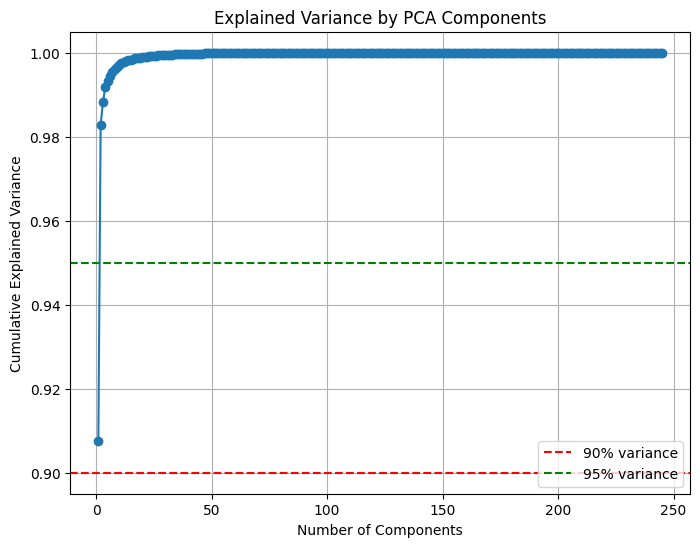

In [8]:
# Apply PCA
pca = PCA()
pca.fit(X_Train_std)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
plt.legend()
plt.show()

In [9]:
# Decide the number of components for desired explained variance
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to retain 90% variance: {num_components_90}")
print(f"Number of components to retain 95% variance: {num_components_95}")

Number of components to retain 90% variance: 1
Number of components to retain 95% variance: 2


In [10]:
# Feature contributions to the first principal component
feature_contributions = pca.components_[0]

# Sort and display the most contributing features
most_contributing_features = np.argsort(np.abs(feature_contributions))[::-1]

print("Top contributing features to the first principal component:")
for i in most_contributing_features[:10]:
    print(f"Feature {i}: {feature_contributions[i]}")


Top contributing features to the first principal component:
Feature 84: 0.06705160778109553
Feature 144: 0.06705157185660483
Feature 83: 0.06705102787742057
Feature 133: 0.06705036129638979
Feature 134: 0.06704872478727088
Feature 123: 0.06704702442066843
Feature 139: 0.06704466614456225
Feature 129: 0.06703999415929925
Feature 204: 0.06703950645473866
Feature 124: 0.06703712651633796


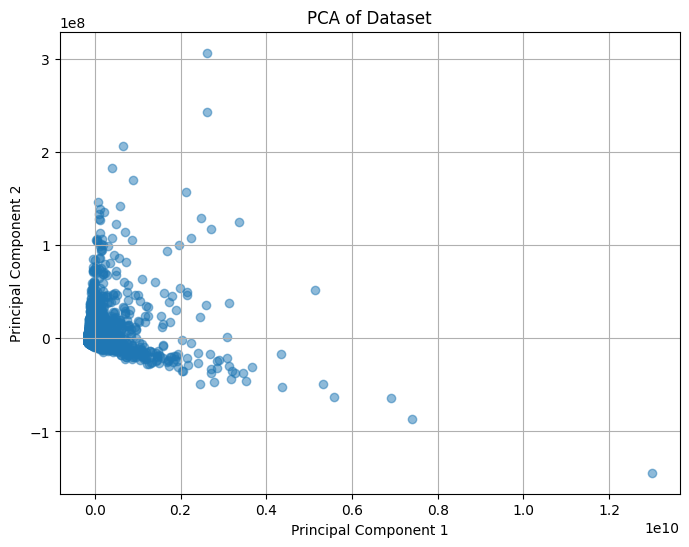

In [11]:
# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_Train)

# Visualizing the data using the top 2 principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

In [12]:
X_tr, X_val, y_tr, y_val = train_test_split(X_reduced, y_Train, test_size=0.3,random_state=42,stratify=y_Train)

## 1. KNN Model

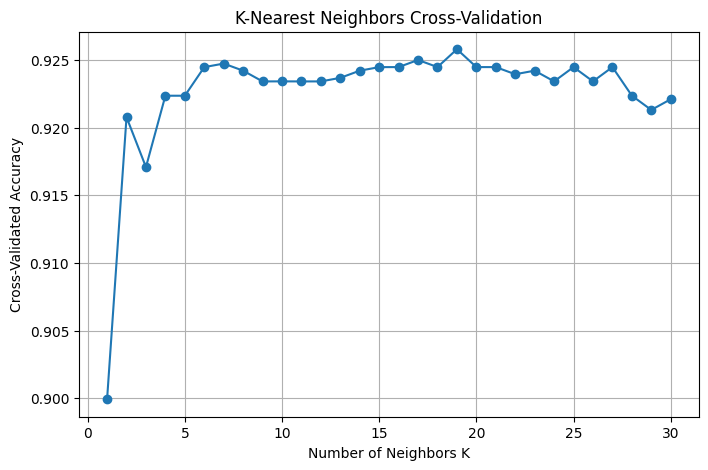

The best value of k is 19 with an accuracy of 0.92580


In [13]:
# Range of k values to test
k_range = range(1, 31)

# List to store cross-validated scores
cv_scores = []

# Perform k-fold cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title('K-Nearest Neighbors Cross-Validation')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

# Best k with highest accuracy
best_k = k_range[np.argmax(cv_scores)]
print(f"The best value of k is {best_k} with an accuracy of {max(cv_scores):.5f}")

In [14]:
# Define the KNN model
k = 19
knn = KNeighborsClassifier(n_neighbors=k)
# Train the model
knn.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=19)

In [15]:
# Make predictions
y_pred = knn.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9365
Confusion Matrix:
[[1462    9]
 [  94   58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1471
           1       0.87      0.38      0.53       152

    accuracy                           0.94      1623
   macro avg       0.90      0.69      0.75      1623
weighted avg       0.93      0.94      0.93      1623



## 2. DBSCAN

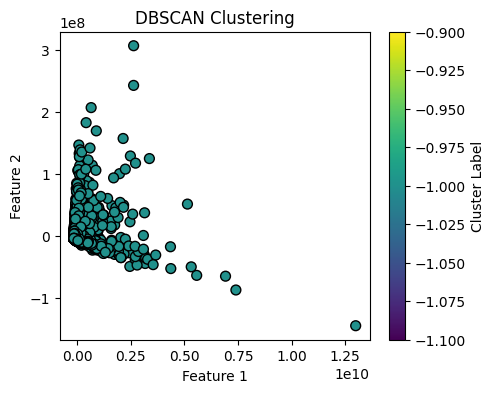

In [16]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=3)
labels1 = dbscan.fit_predict(X_reduced)

# Plot the results
plt.figure(figsize=(5, 4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels1, cmap='viridis', marker='o', s=50, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

In [17]:
# Add cluster labels as a new feature
X_features_with_labels = np.hstack((X_reduced, labels1.reshape(-1, 1)))

In [56]:
# Create features and target variable
X_train1, X_vald1, y_train1, y_vald1 = train_test_split(X_features_with_labels, y_Train, test_size=0.2, random_state=42)

# Train a supervised learning model
model = RandomForestClassifier(random_state=42)
model.fit(X_train1, y_train1)

# Predict and evaluate
y_pred1 = model.predict(X_vald1)
print(model.score(X_vald1,y_vald1))
print(classification_report(y_vald1, y_pred1))

0.9121996303142329
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       977
           1       0.57      0.38      0.46       105

    accuracy                           0.91      1082
   macro avg       0.75      0.68      0.70      1082
weighted avg       0.90      0.91      0.90      1082



In [57]:
# Create an XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Train the model
model.fit(X_train1, y_train1)

# Predict on the validation set
y_pred1 = model.predict(X_vald1)
print(model.score(X_vald1,y_vald1))

# Evaluate the model
print(classification_report(y_vald1, y_pred1))

0.9149722735674677
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       977
           1       0.59      0.41      0.48       105

    accuracy                           0.91      1082
   macro avg       0.76      0.69      0.72      1082
weighted avg       0.90      0.91      0.91      1082



In [58]:
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train1, y_train1)
print(model.score(X_vald1,y_vald1))

# Predict and evaluate
y_pred = model.predict(X_vald1)
print(classification_report(y_vald1, y_pred))

0.8807763401109058
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       977
           1       0.39      0.42      0.41       105

    accuracy                           0.88      1082
   macro avg       0.66      0.67      0.67      1082
weighted avg       0.88      0.88      0.88      1082



## Hierarchical Clustering

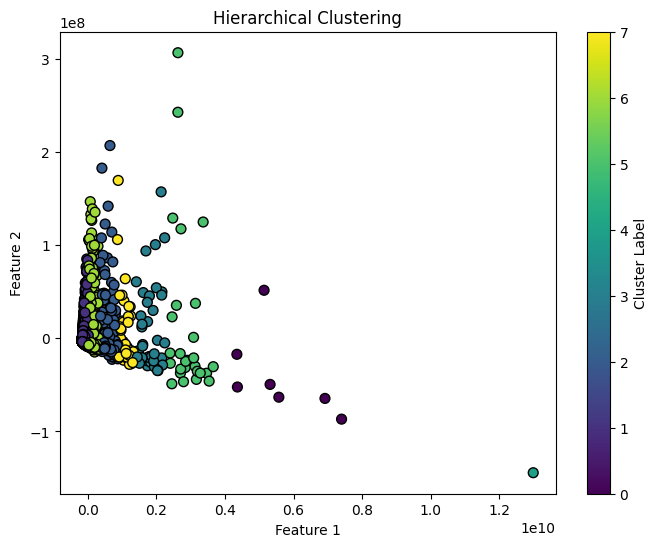

In [21]:
# Perform hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=8, linkage='ward')
labels = hierarchical_clustering.fit_predict(X_reduced)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', marker='o', s=50, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

In [22]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_reduced, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.72


In [23]:
# Add cluster labels as a new feature
X_features_with_labels = np.hstack((X_reduced, labels.reshape(-1, 1)))

In [59]:
# Create features and target variable
X_train, X_vald, y_train, y_vald = train_test_split(X_features_with_labels, y_Train, test_size=0.2, random_state=42)

# Train a supervised learning model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
print(model.score(X_vald,y_vald))

y_pred = model.predict(X_vald)
print(classification_report(y_vald, y_pred))

0.9121996303142329
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       977
           1       0.57      0.38      0.46       105

    accuracy                           0.91      1082
   macro avg       0.75      0.68      0.70      1082
weighted avg       0.90      0.91      0.90      1082



In [60]:

# Create an XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_vald)
print(model.score(X_vald,y_vald))

# Evaluate the model
print(classification_report(y_vald, y_pred))

0.9149722735674677
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       977
           1       0.59      0.41      0.48       105

    accuracy                           0.91      1082
   macro avg       0.76      0.69      0.72      1082
weighted avg       0.90      0.91      0.91      1082



In [61]:
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print(model.score(X_vald,y_vald))

# Predict and evaluate
y_pred = model.predict(X_vald)
print(classification_report(y_vald, y_pred))

0.8807763401109058
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       977
           1       0.39      0.42      0.41       105

    accuracy                           0.88      1082
   macro avg       0.66      0.67      0.67      1082
weighted avg       0.88      0.88      0.88      1082



## Supervised Learning Models

In [27]:
X_tr1, X_val1, y_tr1, y_val1 = train_test_split(X_Train_std, y_Train, test_size=0.3,random_state=42,stratify=y_Train)

In [46]:
# Define and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42,max_iter=1000)
log_reg_model.fit(X_tr1, y_tr1)
y_pred_log_reg = log_reg_model.predict(X_val1)
log_reg_accuracy = accuracy_score(y_val1, y_pred_log_reg)
log_reg_accuracy

0.9359211337030191

In [48]:
# Define and train the Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(X_tr1, y_tr1)
y_pred_svm = svm_model.predict(X_val1)
svm_accuracy = accuracy_score(y_val1, y_pred_svm)
svm_accuracy 

0.9383857054836722

In [42]:
# Train a supervised learning model
model = RandomForestClassifier(random_state=42)
model.fit(X_tr1, y_tr1)

# Make predictions
y_pred2 = model.predict(X_val1)

print(model.score(X_val1,y_val1))
# Evaluate the model
print(classification_report(y_val1, y_pred2))

0.9353049907578558
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1471
           1       0.70      0.54      0.61       152

    accuracy                           0.94      1623
   macro avg       0.83      0.76      0.79      1623
weighted avg       0.93      0.94      0.93      1623



In [41]:
# Train a supervised learning model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_tr1, y_tr1)

# Make predictions
y_pred2 = model.predict(X_val1)

print(model.score(X_val1,y_val1))
# Evaluate the model
print(classification_report(y_val1, y_pred2))

0.9303758471965496
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1471
           1       0.66      0.52      0.58       152

    accuracy                           0.93      1623
   macro avg       0.81      0.75      0.77      1623
weighted avg       0.92      0.93      0.93      1623



In [55]:
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_tr1, y_tr1)
print(model.score(X_val1,y_val1))

# Predict and evaluate
y_pred2 = model.predict(X_val1)
print(classification_report(y_val1, y_pred2))

0.9075785582255084
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1471
           1       0.51      0.55      0.53       152

    accuracy                           0.91      1623
   macro avg       0.73      0.75      0.74      1623
weighted avg       0.91      0.91      0.91      1623



## Neural Networks

In [33]:
# Build the neural network
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_tr1.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_tr1, y_tr1, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_val1, y_val1)
print(f'Test Accuracy: {accuracy:.5f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8895 - loss: 0.3151 - val_accuracy: 0.9327 - val_loss: 0.1695
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9311 - loss: 0.1835 - val_accuracy: 0.9063 - val_loss: 0.1898
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9182 - loss: 0.1900 - val_accuracy: 0.9156 - val_loss: 0.1689
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9322 - loss: 0.1788 - val_accuracy: 0.9182 - val_loss: 0.1701
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9294 - loss: 0.1745 - val_accuracy: 0.9248 - val_loss: 0.1636
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9222 - loss: 0.1896 - val_accuracy: 0.9354 - val_loss: 0.1557
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9287 - loss: 0.1755 - val_accuracy: 0.9261 - val_loss: 0.1600
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9258 - loss: 0.1961 - val_accuracy: 0.9380 - val_loss:

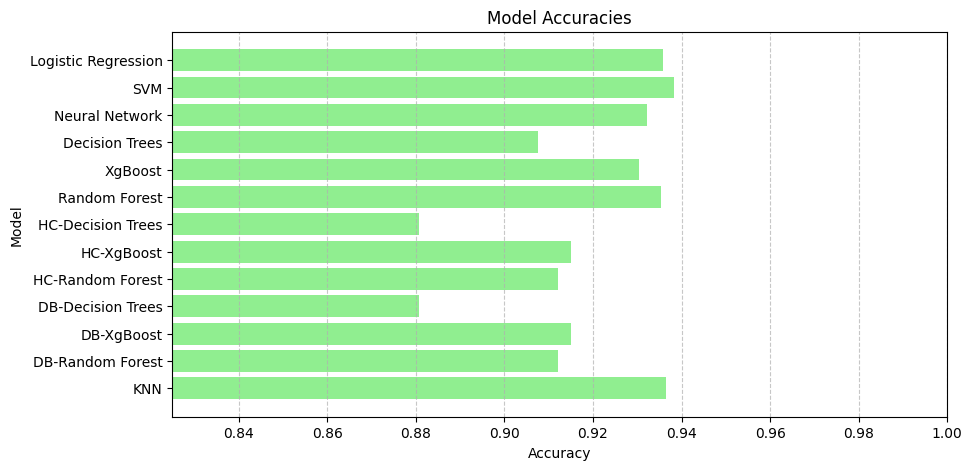

In [72]:
# Replace these with your actual model names and accuracies
model_names = ['KNN','DB-Random Forest','DB-XgBoost','DB-Decision Trees','HC-Random Forest','HC-XgBoost',
               'HC-Decision Trees','Random Forest','XgBoost','Decision Trees', 'Neural Network','SVM', 'Logistic Regression']
accuracies = [0.9365, 0.9121, 0.9150,0.8808,0.9122,0.9150,0.8808,0.9353,0.9303,0.9075,0.9322,0.9384, 0.9359]  

# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.barh(model_names, accuracies, color='lightgreen')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracies')
plt.xlim(0.825, 1)  # Assuming accuracy is between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()